# Pilgrimm

[![Google Colab](https://badgen.net/badge/Launch/on%20Google%20Colab/blue?icon=terminal)](https://colab.research.google.com/github/sflippl/patches/blob/master/usage/pilgrimm.ipynb)

In [ ]:
# Run in Google Colab
!pip install git+https://github.com/sflippl/patches

In [2]:
import patches

## On latent predictability

Latent predictability can be well modelled using the compositional binary and the compositional geometric model.

In [3]:
cbm = patches.datasets.compositional_binary_model(
    width=10,
    change_probs=[0.05, 0.5],
    samples=100
)

In [2]:
cbm.animate(html=True)

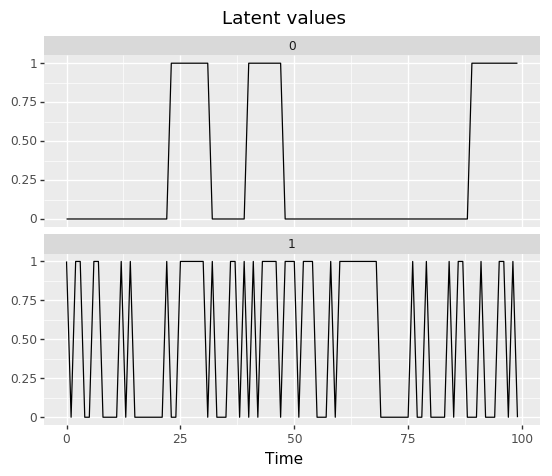

<ggplot: (8774376832730)>

In [5]:
cbm.latent_evolution(ncol=1)

For a more complex system, the compositional geometric model allows for specification of arbitrary shapes. This can be scaled up arbitrarily; up to Imagenet pictures -- you simply need to provide numpy arrays. For this purpose, I will implement a more elaborate hierarchical transitional system -- but the underlying pilgrimm class allows for such modifications already (see below).

In [6]:
cgm = patches.datasets.compositional_geometric_model(
    width=10,
    shapes=[[patches.datasets.pilgrimm.horizontal(2),
             patches.datasets.pilgrimm.vertical(2)],
            [patches.datasets.pilgrimm.diagonal(2),
             patches.datasets.pilgrimm.antidiagonal(2)]],
    change_probs=[0.05, 0.5],
    samples=100
)

In [6]:
cgm.animate(html=True)

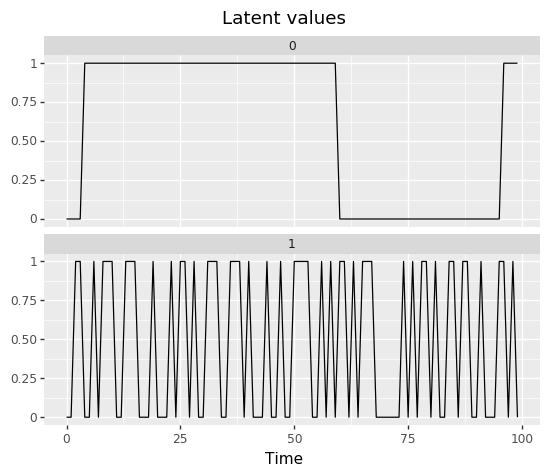

<ggplot: (-9223363262474533916)>

In [8]:
cgm.latent_evolution(ncol=1)

## On occlusion

The data will be complicated by certain frames in which the information may only partially or not at all be available. This can be addressed by an autoregressive model, and the simplest use case is the occluded binary model below:

In [9]:
obm = patches.datasets.occluded_binary_model(
    width=10,
    change_probs=[0.05, 0.5],
    occlusion_range=0.01,
    occlusion_probs=0.1,
    samples=100
)

In [7]:
obm.animate(html=True)

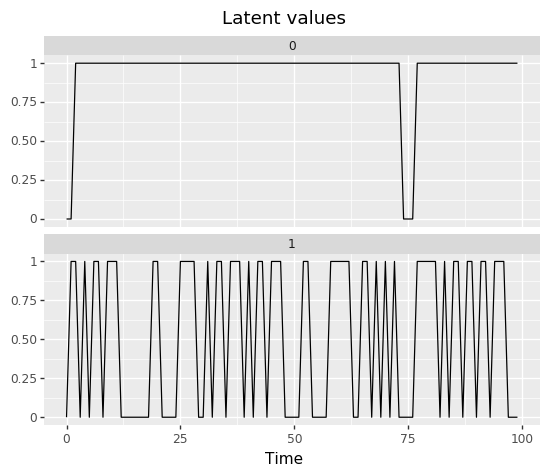

<ggplot: (8774370931709)>

In [10]:
obm.latent_evolution(ncol=1)

This may be scaled up to a geometric model, as well:

In [8]:
ogm = patches.datasets.occluded_geometric_model(
    width=10,
    shapes=[[patches.datasets.pilgrimm.horizontal(2),
             patches.datasets.pilgrimm.vertical(2)],
            [patches.datasets.pilgrimm.diagonal(2),
             patches.datasets.pilgrimm.antidiagonal(2)]],
    change_probs=[0.05, 0.5],
    occlusion_range=0.01,
    occlusion_probs=0.1,
    samples=100
)
ogm.animate(html=True)

This may also be applied to sequentially evolving processes:

In [11]:
sgm = patches.datasets.sequential_geometric_model(
    width=10,
    shapes=[
        patches.datasets.pilgrimm.horizontal(n)\
        for n in range(2, 11)
    ],
    occlusion_range=0.01,
    occlusion_probs=[0.1],
    samples=100
)

In [11]:
sgm.animate(html=True)

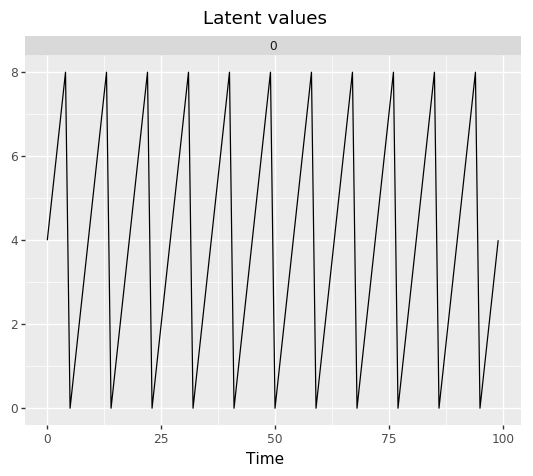

<ggplot: (-9223363262316048496)>

In [12]:
sgm.latent_evolution()

## Object impermanence

Another dataset may contrast object permanence and impermanence. The 'magic' argument may also be applied to the occluding arguments above.

In [18]:
sgm = patches.datasets.sequential_geometric_model(
    width=10,
    shapes=[
        patches.datasets.pilgrimm.vertical(n)\
        for n in range(2, 11)
    ],
    occlusion_range=0.01,
    occlusion_probs=[0.1],
    samples=100,
    magic=True
)

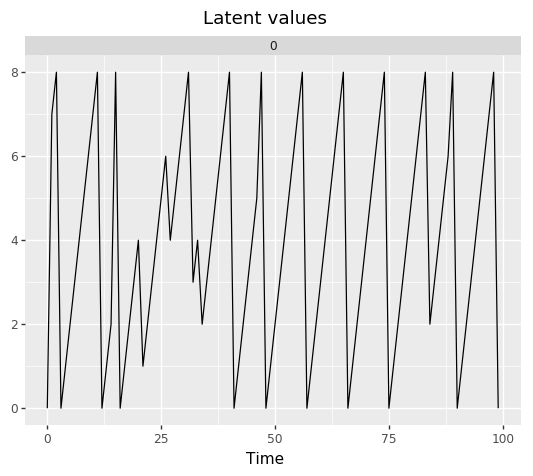

<ggplot: (-9223363262483842777)>

In [19]:
sgm.latent_evolution()

In [21]:
sgm.animate(html=True)

In [26]:
osm = patches.datasets.object_slots_model(
    samples=100,
    occlusion_ranges=0.01,
    appearance_probs=0.1,
    occlusion_probs=0.1,
    magic=[False, True]
)

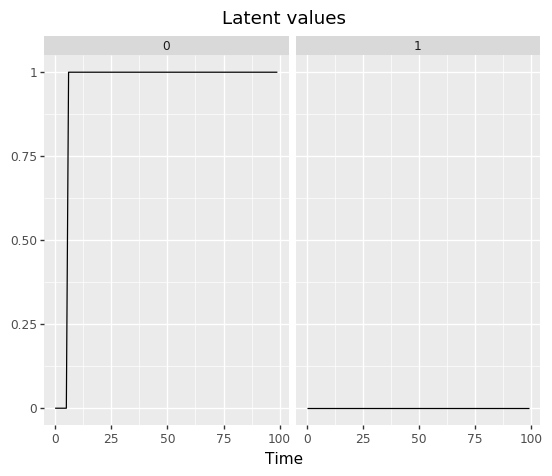

<ggplot: (-9223363262478028940)>

In [27]:
osm.latent_evolution()

In [28]:
osm.animate(html=True)

## Layered geometric model

Layered geometric models combine both challenges, occlusion and latent predictability.

In [2]:
lgm = patches.datasets.layered_geometric_model(
    width=10,
    shapes=[
        [patches.datasets.pilgrimm.horizontal(2),
         patches.datasets.pilgrimm.vertical(2)],
        [patches.datasets.pilgrimm.diagonal(2),
         patches.datasets.pilgrimm.antidiagonal(2)]
    ],
    samples=100
)
lgm.animate(html=True)

Again, this could consist of more complex letters.